# Imports

In [1]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
tqdm.pandas()

file_name = "ipn_parsed_data.parquet"

In [2]:
df = pd.read_parquet(file_name)

In [3]:
df.head()

,url,title,body,author,category,scraped_at,pub_dt
0,https://www.interpressnews.ge/article/350170-d...,"დედაქალაქის მერმა ""თბილისზე მზრუნველი"" მოქალაქ...","თბილისის მერმა დავით ნარმანიამ ""თბილისზე მზრუნ...",None,[],2025-01-07T12:22:08.109365,2015-10-18T20:51
1,https://www.interpressnews.ge/article/112924-q...,&quot;რედისონ სას ივერიაში&quot; ოპოზიციის ლიდ...,"სასტუმრო ""რედისონ სას ივერიაში"" ოპოზიციის ლიდე...",None,[],2025-01-07T12:22:08.109793,2009-10-14T15:38
2,https://www.interpressnews.ge/article/441572-o...,"ოპოზიციური პარტიების, დიპლომატების, ომბუდსმენი...","სასტუმრო ""რედისონში"" არასაპარლამენტო და საპარლ...",None,[],2025-01-07T12:22:08.110031,2017-07-05T11:23
3,https://www.interpressnews.ge/article/604248-s...,საქართველოში კორონავირუსის 6 ახალი შემთხვევა გ...,საქართველოში კორონავირუსით ინფიცირების შემთხვე...,None,['საზოგადოება'],2025-01-07T12:22:08.110368,2020-06-12T10:06
4,https://www.interpressnews.ge/article/743392-e...,"ეკა ხერხეულიძე - მოლოდინი, რომ ამ ვითარებაში ს...","ნებისმიერი ადამიანის მოლოდინი, რომ შესაძლებელი...",None,['პოლიტიკა'],2025-01-07T12:22:08.111015,2023-02-03T13:30


# Small preprocessing

In [4]:
df['title'] = df['title'].progress_apply(lambda x: x.replace('\xa0', ' '))
df['body'] = df['body'].progress_apply(lambda x: x.replace('\xa0', ' '))

100%|██████████| 729947/729947 [00:00<00:00, 970000.89it/s]


In [5]:
df.head()

,url,title,body,author,category,scraped_at,pub_dt
0,https://www.interpressnews.ge/article/350170-d...,"დედაქალაქის მერმა ""თბილისზე მზრუნველი"" მოქალაქ...","თბილისის მერმა დავით ნარმანიამ ""თბილისზე მზრუნ...",None,[],2025-01-07T12:22:08.109365,2015-10-18T20:51
1,https://www.interpressnews.ge/article/112924-q...,&quot;რედისონ სას ივერიაში&quot; ოპოზიციის ლიდ...,"სასტუმრო ""რედისონ სას ივერიაში"" ოპოზიციის ლიდე...",None,[],2025-01-07T12:22:08.109793,2009-10-14T15:38
2,https://www.interpressnews.ge/article/441572-o...,"ოპოზიციური პარტიების, დიპლომატების, ომბუდსმენი...","სასტუმრო ""რედისონში"" არასაპარლამენტო და საპარლ...",None,[],2025-01-07T12:22:08.110031,2017-07-05T11:23
3,https://www.interpressnews.ge/article/604248-s...,საქართველოში კორონავირუსის 6 ახალი შემთხვევა გ...,საქართველოში კორონავირუსით ინფიცირების შემთხვე...,None,['საზოგადოება'],2025-01-07T12:22:08.110368,2020-06-12T10:06
4,https://www.interpressnews.ge/article/743392-e...,"ეკა ხერხეულიძე - მოლოდინი, რომ ამ ვითარებაში ს...","ნებისმიერი ადამიანის მოლოდინი, რომ შესაძლებელი...",None,['პოლიტიკა'],2025-01-07T12:22:08.111015,2023-02-03T13:30


# Counting words and chars 

In [6]:
df['words_count'] = df.progress_apply(lambda x: len((x['title'] + '\n' + x['body']).split()), axis=1)
df['chars_count'] = df.progress_apply(lambda x: len(x['title'] + '\n' + x['body']), axis=1)

print(f"Total number of words are {df['words_count'].sum()}")
print(f"Total number of chars are {df['chars_count'].sum()}")

100%|██████████| 729947/729947 [00:02<00:00, 275432.26it/s]

Total number of words are 132674791
Total number of chars are 1160645569


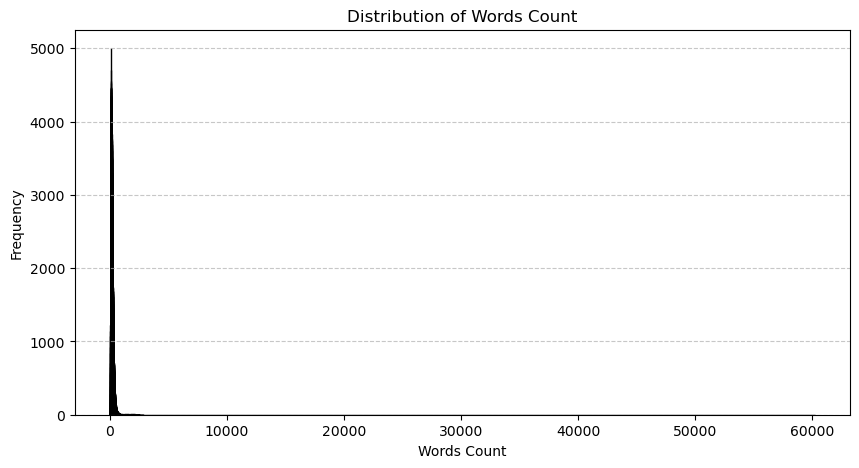

In [9]:
# Plot 1: Distribution of `words_count`
plt.figure(figsize=(10, 5))
plt.hist(df["words_count"], bins=range(df["words_count"].min(), df["words_count"].max() + 2), edgecolor='black', align='left')
plt.title("Distribution of Words Count")
plt.xlabel("Words Count")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

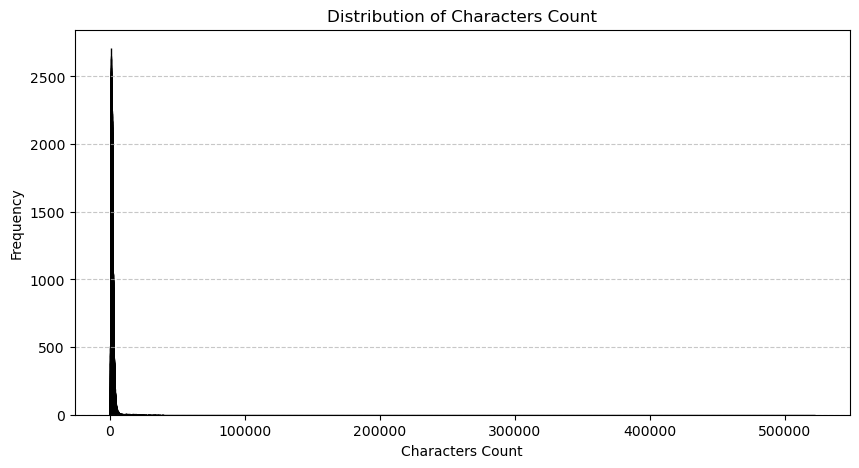

In [10]:
# Plot 2: Distribution of `chars_count`
plt.figure(figsize=(10, 5))
plt.hist(df["chars_count"], bins=range(df["chars_count"].min(), df["chars_count"].max() + 2, 5), edgecolor='black', align='left')
plt.title("Distribution of Characters Count")
plt.xlabel("Characters Count")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Printing outliers

In [11]:
def find_outliers_df(df, column_name):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    # Calculate IQR
    IQR = Q3 - Q1
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter DataFrame for outliers
    outliers_df = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    return outliers_df

# Find outliers for `words_count`
words_outliers_df = find_outliers_df(df, "words_count")

# Find outliers for `chars_count`
chars_outliers_df = find_outliers_df(df, "chars_count")

# Combine both to see all outliers in a single DataFrame
extreme_values_df = pd.concat([words_outliers_df, chars_outliers_df]).drop_duplicates()

In [12]:
extreme_values_df.sort_values(by="chars_count", ascending=False).head()

,url,title,body,author,category,scraped_at,pub_dt,words_count,chars_count
161300,https://www.interpressnews.ge/article/381972-b...,ბიძინა ივანიშვილი ღია წერილს აქვეყნებს,საქართველოს ყოფილი პრემიერ-მინისტრი ბიძინა ივა...,None,[],2025-01-07T12:22:13.313551,2016-05-30T12:11,60212,522092
122870,https://www.interpressnews.ge/article/800991-k...,ქართული პრესის მიმოხილვა 27.05.2024,"გიორგი კობერიძე - “ისმის კითხვა, წარმოადგენს კ...",None,['პრესის მიმოხილვა'],2025-01-07T12:22:41.678650,2024-05-27T09:00,9563,80311
5440,https://www.interpressnews.ge/article/747288-k...,ქართული პრესის მიმოხილვა 06.03.2023,"თენგიზ ფხალაძე - “დასავლეთი ცდილობს, არ დაგვაშ...",None,['პრესის მიმოხილვა'],2025-01-07T12:22:26.483056,2023-03-06T09:29,9129,76403
512060,https://www.interpressnews.ge/article/260496-s...,სამთავრობო პროგრამა,"„ძლიერი, დემოკრატიული, ერთიანი საქართველოსთვის...",None,[],2025-01-07T12:22:57.269675,2013-11-20T16:12,7333,75533
388278,https://www.interpressnews.ge/article/779899-k...,ქართული პრესის მიმოხილვა 04.12.2023,ვახტანგ ძაბირაძე - “ზურაბიშვილმა უნდა დატოვოს ...,None,['პრესის მიმოხილვა'],2025-01-07T12:22:11.617409,2023-12-04T09:07,8394,71099


In [13]:
extreme_values_df.sort_values(by="words_count", ascending=False).head()

,url,title,body,author,category,scraped_at,pub_dt,words_count,chars_count
161300,https://www.interpressnews.ge/article/381972-b...,ბიძინა ივანიშვილი ღია წერილს აქვეყნებს,საქართველოს ყოფილი პრემიერ-მინისტრი ბიძინა ივა...,None,[],2025-01-07T12:22:13.313551,2016-05-30T12:11,60212,522092
122870,https://www.interpressnews.ge/article/800991-k...,ქართული პრესის მიმოხილვა 27.05.2024,"გიორგი კობერიძე - “ისმის კითხვა, წარმოადგენს კ...",None,['პრესის მიმოხილვა'],2025-01-07T12:22:41.678650,2024-05-27T09:00,9563,80311
5440,https://www.interpressnews.ge/article/747288-k...,ქართული პრესის მიმოხილვა 06.03.2023,"თენგიზ ფხალაძე - “დასავლეთი ცდილობს, არ დაგვაშ...",None,['პრესის მიმოხილვა'],2025-01-07T12:22:26.483056,2023-03-06T09:29,9129,76403
388278,https://www.interpressnews.ge/article/779899-k...,ქართული პრესის მიმოხილვა 04.12.2023,ვახტანგ ძაბირაძე - “ზურაბიშვილმა უნდა დატოვოს ...,None,['პრესის მიმოხილვა'],2025-01-07T12:22:11.617409,2023-12-04T09:07,8394,71099
553511,https://www.interpressnews.ge/article/810663-k...,ქართული პრესის მიმოხილვა 02.09.2024,სანდრო თვალჭრელიძე - “კოალიციური მთავრობა არის...,None,['პრესის მიმოხილვა'],2025-01-07T12:22:33.196271,2024-09-02T08:59,8254,70160


In [14]:
extreme_values_df.sort_values(by="chars_count").head()

,url,title,body,author,category,scraped_at,pub_dt,words_count,chars_count
463145,https://www.interpressnews.ge/article/8883-kal...,კალაძე და “მილანი” უეფას თასის ფლეი-ოფში გავიდნენ,უეფას თასის ჯგუფური ეტაპის ბოლო V ტურის პირველ...,None,[],2025-01-07T12:22:36.872410,2008-12-18T17:01,389,2303
294616,https://www.interpressnews.ge/article/136071-1...,17:00 საათისთვის ამომრჩეველთა 40%-იანი აქტივობ...,"17:00 საათის მონაცემებით, 30 მაისის არჩევნებზე...",None,['არჩევნები'],2025-01-07T12:22:45.813182,2010-05-30T19:12,418,2343
364114,https://www.interpressnews.ge/article/281004-n...,NDI-მ პრემიერის საქმიანობა კონკრეტულ სფეროებთა...,"NDI-ის მიერ ჩატარებული კვლევის თანახმად, პრემი...",None,[],2025-01-07T12:22:50.225111,2014-05-08T14:24,446,2465
683554,https://www.interpressnews.ge/article/608032-s...,საგამოცდო ცენტრებში მისასვლელად დამატებითი საზ...,საგამოცდო ცენტრებში მისასვლელად დამატებითი საზ...,None,['საზოგადოება'],2025-01-07T12:22:53.531411,2020-07-06T08:25,382,2501
450822,https://www.interpressnews.ge/article/289642-e...,Election administration is fully ready to con...,The Chairperson of the Central Election Commis...,None,['პოლიტიკა'],2025-01-07T12:22:34.453472,2014-07-12T09:17,390,2502


In [15]:
extreme_values_df.sort_values(by="words_count").head()

,url,title,body,author,category,scraped_at,pub_dt,words_count,chars_count
661761,https://www.interpressnews.ge/article/653836-p...,"პროგრამა „განახლებული რეგიონების“ ფარგლებში, დ...",პრემიერ-მინისტრის ინიციატივით დაწყებული „განახ...,None,['საზოგადოება'],2025-01-07T12:22:13.006047,2021-04-28T18:48,229,3331
26751,https://www.interpressnews.ge/article/343532-g...,განათლება ყველასათვის - საქართველოს მე-2 ყოველ...,საუკეთესო ჟურნალისტური ნამუშევარი განათლების თ...,None,[],2025-01-07T12:22:19.618589,2015-08-31T08:17,283,3530
272618,https://www.interpressnews.ge/article/222788-b...,"""ბანკი ქართუ"" ბანკის სასარგებლოდ იპოთეკით დატვ...","""ბანკი ქართუ"" ბანკის სასარგებლოდ იპთეკით დატვი...",None,[],2025-01-07T12:22:51.520716,2012-12-05T14:39,295,4095
709580,https://www.interpressnews.ge/article/743390-g...,გზების დეპარტამენტი - საავტომობილო გზების გაწმ...,"გართულებული მეტეოროლოგიური პირობების გამო, საა...",None,['საზოგადოება'],2025-01-07T12:22:20.180796,2023-02-03T13:25,297,3394
133488,https://www.interpressnews.ge/article/289260-s...,შალვა ფიფიამ სასოფლო-სამეურნეო კოოპერატივების ...,გაერო-ს სურსათისა და სოფლის მეურნეობის ორგანიზ...,None,[],2025-01-07T12:22:39.092487,2014-07-09T15:22,308,3315


# Words Length Distributions

In [16]:
# Tokenize words and calculate word lengths
all_words = [word for sentence in (df["title"] + ' ' + df['body']) for word in sentence.split()]
word_lengths = [len(word) for word in all_words]

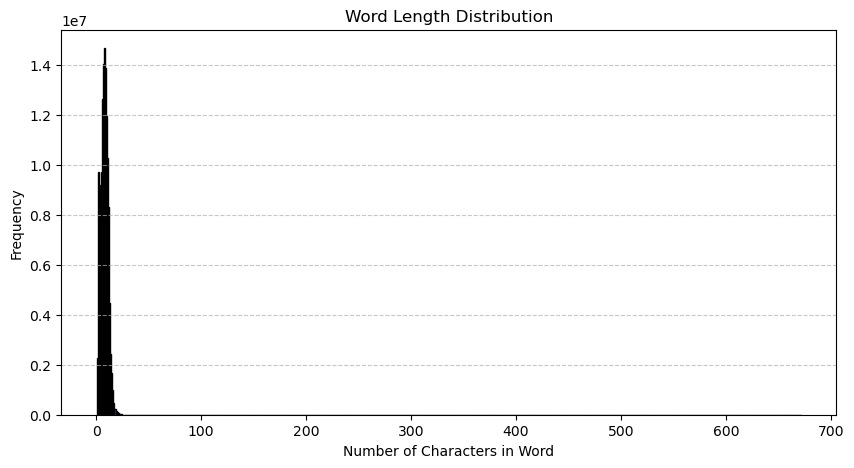

In [17]:
# Plot Word Length Distribution
plt.figure(figsize=(10, 5))
plt.hist(word_lengths, bins=range(1, max(word_lengths) + 1), edgecolor='black', align='left')
plt.title("Word Length Distribution")
plt.xlabel("Number of Characters in Word")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [18]:
# Combine words with their lengths
word_length_pairs = list(zip(all_words, word_lengths))


# Sort by word length in descending order
sorted_word_length_pairs = sorted(word_length_pairs, key=lambda x: x[1], reverse=True)

# Print top highest words with their lengths
top_n = 10  # Number of top longest words to display
print(f"Top {top_n} longest words with their lengths:")
for word, length in sorted_word_length_pairs[:top_n]:
    print(f"{word}: {length}")

Top 10 longest words with their lengths:
მოზიდვაა.;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;: 672
გამოქვეყნდა.;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;

# Wordclouds

In [ ]:
# Combine title and body into a single text
text = " ".join(df["title"] + ' ' + df["body"])

# Initialize CountVectorizer for bigrams
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))
bigram_counts = bigram_vectorizer.fit_transform([text])

# Initialize CountVectorizer for trigrams
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3))
trigram_counts = trigram_vectorizer.fit_transform([text])

# Convert bigram counts to a dictionary
bigram_counts_dict = dict(zip(bigram_vectorizer.get_feature_names_out(), bigram_counts.toarray()[0]))

# Convert trigram counts to a dictionary
trigram_counts_dict = dict(zip(trigram_vectorizer.get_feature_names_out(), trigram_counts.toarray()[0]))

In [ ]:
# Get top 500 bigrams by count
top_500_bigrams = sorted(bigram_counts_dict.items(), key=lambda x: x[1], reverse=True)[:500]
top_500_bigrams_dict = dict(top_500_bigrams)  # Convert back to dictionary if needed

# Get top 500 trigrams by count
top_500_trigrams = sorted(trigram_counts_dict.items(), key=lambda x: x[1], reverse=True)[:500]
top_500_trigrams_dict = dict(top_500_trigrams)  # Convert back to dictionary if needed

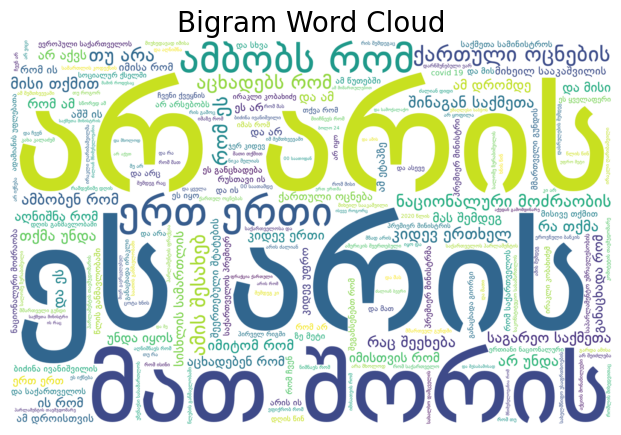

In [18]:
# Generate the word cloud
bigram_wordcloud = WordCloud(background_color='white', width=1600, height=1024, font_path='./bpg_dejavu_sans.otf').generate_from_frequencies(top_500_bigrams_dict)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(bigram_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Bigram Word Cloud", fontsize=20)
plt.show()

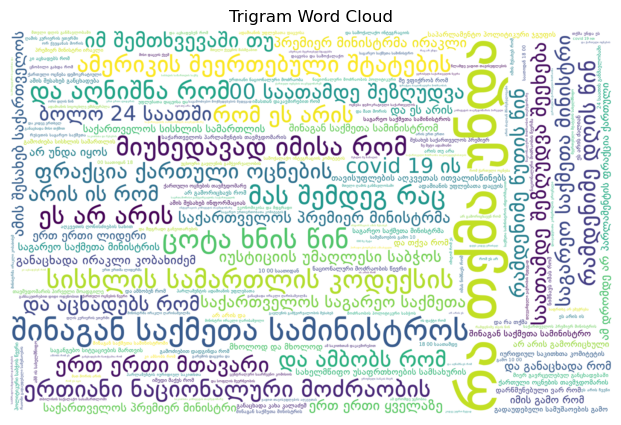

In [19]:
# Generate word cloud for trigrams
trigram_wordcloud = WordCloud(background_color='white', width=1600, height=1024, font_path='./bpg_dejavu_sans.otf').generate_from_frequencies(top_500_trigrams_dict)

plt.figure(figsize=(10, 5))
plt.imshow(trigram_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Trigram Word Cloud")
plt.show()